# 1. Tools and Dependencies

### Resources used in this project:
- Python https://www.python.org/
- Conda https://anaconda.cloud/getting-started-with-anaconda-individual-edition
- Jupyter Notebook https://jupyter.org/
- Tensorflow https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html
- Tensorflow Records https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#create-tensorflow-records
- OpenCV https://opencv.org/
- NumPy https://numpy.org/
- MediaPipe https://google.github.io/mediapipe/
- Scikit-Learn https://scikit-learn.org/stable/
- Matplotlib https://matplotlib.org/

In [1]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

^C


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Define keypoints - MediaPipe Holistic

In [3]:
mp_holistic = mp.solutions.holistic                 
mp_drawing = mp.solutions.drawing_utils            

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                 
    results = model.process(image)               
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,128), thickness=1, circle_radius=1)
                             ) 
    # body
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
                             ) 
    # left hand
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
# capture a sing to initialize, cv2.VideoCapture(num) where num is a device number - depends on the laptop used, macbook - 0, surface 1 
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Web Camera Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

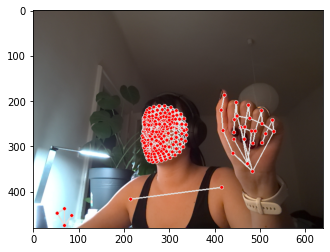

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Keypoints

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
# store key points as one array

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)
#extract_keypoints(results).shape > (1662,)

In [15]:
result_test

array([ 0.40978017,  0.56719834, -0.69460022, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.40978017,  0.56719834, -0.69460022, ...,  0.        ,
        0.        ,  0.        ])

  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached tensorflow_gpu-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-cp39-cp39-win_amd64.whl size=32993 sha256=bdca6423452b8dbab04fd9c3edf1a343da5c51528ff9fdd5cd1e96fa0428c8df
  Stored in directory: c:\users\aernis\appdata\local\pip\cache\wheels\98\23\68\efe259aaca055e93b08e74fbe512819c69a2155c11ba3c0f10
Successfully built wrapt
  Attempting uninstall: six
    Found existing installation: six 1.

# 4. Collect Images

In [29]:
# folder for data - each sign has its own folder (data/a, data/b, data/c, ect)
DATA_PATH = os.path.join('data') 

actions = np.array(['a','b','c','d','e', 'f', 'g', 'h']) # signs

no_sequences = 100 # videos per sign

sequence_length = 10 # frames per sign

start_folder = 1

In [22]:
# create folder for each sign, each sign folder has separate folder to store separate stacks of frames
for action in actions: 
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect the data

In [23]:
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:

        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                # when "Start" is displayed a sign needs to be shown
                if frame_num == 0: 
                    cv2.putText(image, 'Start', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(800, 10, 1662)

In [35]:
np.array(labels).shape

(800,)

In [36]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [37]:
X = np.array(sequences)

In [38]:
X.shape

(800, 10, 1662)

In [39]:
y = to_categorical(labels).astype(int)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(15, 3)

# 7. Build and Train LSTM Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [48]:
# Log training
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [49]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=400, callbacks=[tb_callback])

Epoch 1/600
24/24 [==============================] - 6s 98ms/step - loss: 2.0809 - categorical_accuracy: 0.1165
Epoch 2/600
24/24 [==============================] - 1s 22ms/step - loss: 1.9446 - categorical_accuracy: 0.1660
Epoch 3/600
24/24 [==============================] - 0s 20ms/step - loss: 1.7205 - categorical_accuracy: 0.3304
Epoch 4/600
24/24 [==============================] - 1s 21ms/step - loss: 1.4550 - categorical_accuracy: 0.3840
Epoch 5/600
24/24 [==============================] - 0s 20ms/step - loss: 1.2991 - categorical_accuracy: 0.4554
Epoch 6/600
24/24 [==============================] - 0s 20ms/step - loss: 1.3670 - categorical_accuracy: 0.4304
Epoch 7/600
24/24 [==============================] - 1s 21ms/step - loss: 1.2340 - categorical_accuracy: 0.4774
Epoch 8/600
24/24 [==============================] - 1s 21ms/step - loss: 1.1909 - categorical_accuracy: 0.4360
Epoch 9/600
24/24 [==============================] - 0s 21ms/step - loss: 0.9831 - categorical_accuracy:

24/24 [==============================] - 1s 23ms/step - loss: 0.2854 - categorical_accuracy: 0.9008
Epoch 146/600
24/24 [==============================] - 1s 30ms/step - loss: 0.1129 - categorical_accuracy: 0.9586
Epoch 147/600
24/24 [==============================] - 1s 28ms/step - loss: 0.1966 - categorical_accuracy: 0.9197
Epoch 148/600
24/24 [==============================] - 1s 27ms/step - loss: 0.2451 - categorical_accuracy: 0.9044
Epoch 149/600
24/24 [==============================] - 1s 32ms/step - loss: 0.2934 - categorical_accuracy: 0.8991
Epoch 150/600
24/24 [==============================] - 1s 33ms/step - loss: 0.3852 - categorical_accuracy: 0.8359
Epoch 151/600
24/24 [==============================] - 1s 28ms/step - loss: 0.1391 - categorical_accuracy: 0.9603
Epoch 152/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0818 - categorical_accuracy: 0.9830
Epoch 153/600
24/24 [==============================] - 1s 31ms/step - loss: 0.0889 - categorical_accur

24/24 [==============================] - 1s 28ms/step - loss: 0.6503 - categorical_accuracy: 0.8194
Epoch 286/600
24/24 [==============================] - 1s 29ms/step - loss: 0.1344 - categorical_accuracy: 0.9634
Epoch 287/600
24/24 [==============================] - 1s 28ms/step - loss: 0.0555 - categorical_accuracy: 0.9914
Epoch 288/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0281 - categorical_accuracy: 0.9894
Epoch 289/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0291 - categorical_accuracy: 0.9904
Epoch 290/600
24/24 [==============================] - 1s 31ms/step - loss: 0.0176 - categorical_accuracy: 0.9967
Epoch 291/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0111 - categorical_accuracy: 1.0000
Epoch 292/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0101 - categorical_accuracy: 1.0000
Epoch 293/600
24/24 [==============================] - 1s 29ms/step - loss: 0.0178 - categorical_accur

24/24 [==============================] - 1s 40ms/step - loss: 1.3557e-04 - categorical_accuracy: 1.0000
Epoch 426/600
24/24 [==============================] - 1s 41ms/step - loss: 8.9319e-05 - categorical_accuracy: 1.0000
Epoch 427/600
24/24 [==============================] - 1s 42ms/step - loss: 1.0709e-04 - categorical_accuracy: 1.0000
Epoch 428/600
24/24 [==============================] - 1s 40ms/step - loss: 1.0340e-04 - categorical_accuracy: 1.0000
Epoch 429/600
24/24 [==============================] - 1s 43ms/step - loss: 1.1407e-04 - categorical_accuracy: 1.0000
Epoch 430/600
24/24 [==============================] - 1s 40ms/step - loss: 1.0652e-04 - categorical_accuracy: 1.0000
Epoch 431/600
24/24 [==============================] - 1s 41ms/step - loss: 9.1830e-05 - categorical_accuracy: 1.0000
Epoch 432/600
24/24 [==============================] - 1s 42ms/step - loss: 8.8705e-05 - categorical_accuracy: 1.0000
Epoch 433/600
24/24 [==============================] - 1s 39ms/step - 

24/24 [==============================] - 1s 36ms/step - loss: 4.3444e-06 - categorical_accuracy: 1.0000
Epoch 564/600
24/24 [==============================] - 1s 38ms/step - loss: 4.0498e-06 - categorical_accuracy: 1.0000
Epoch 565/600
24/24 [==============================] - 1s 36ms/step - loss: 3.6227e-06 - categorical_accuracy: 1.0000
Epoch 566/600
24/24 [==============================] - 1s 36ms/step - loss: 3.7083e-06 - categorical_accuracy: 1.0000
Epoch 567/600
24/24 [==============================] - 1s 37ms/step - loss: 4.6432e-06 - categorical_accuracy: 1.0000
Epoch 568/600
24/24 [==============================] - 1s 34ms/step - loss: 4.4926e-06 - categorical_accuracy: 1.0000
Epoch 569/600
24/24 [==============================] - 1s 33ms/step - loss: 4.0733e-06 - categorical_accuracy: 1.0000
Epoch 570/600
24/24 [==============================] - 1s 39ms/step - loss: 4.6605e-06 - categorical_accuracy: 1.0000
Epoch 571/600
24/24 [==============================] - 1s 37ms/step - 

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
Total params: 596,840
Trainable params: 596,840
Non-trainable params: 0
________________________________________________

# 8. Test Predictions

In [53]:
res = model.predict(X_test)

In [54]:
actions[np.argmax(res[4])]

'h'

In [55]:
actions[np.argmax(y_test[4])]

'h'

# 9. Accuracy

In [56]:
model.save('action.h5')

In [57]:
#del model

In [58]:
model.load_weights('action.h5')

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)

In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[33,  1],
        [ 0,  6]],

       [[35,  0],
        [ 0,  5]],

       [[39,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  3]],

       [[37,  0],
        [ 2,  1]],

       [[32,  0],
        [ 0,  8]],

       [[33,  1],
        [ 0,  6]],

       [[32,  0],
        [ 0,  8]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)

0.95